# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sn

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = len(df["Mouse ID"].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = df[df.duplicated()]
duplicate["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = df.loc[df["Mouse ID"] == "g989"]
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[(df["Mouse ID"] != "g989") , :]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_count = len(clean_df["Mouse ID"].unique())
clean_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tum_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med_tum_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tum_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tum_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tum_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tum_summary = pd.DataFrame({"Mean Tumor Volume" : mean_tum_vol,
"Median Tumor Volume" : med_tum_vol,
"Tumor Volume Variance" : var_tum_vol,
"Tumor Volume Std. Dev." : std_tum_vol,
"Tumor Volume Std. Err." : sem_tum_vol
})
tum_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_summary = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

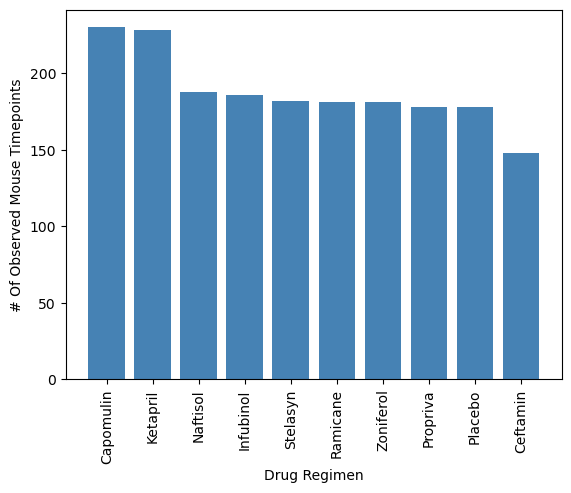

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints = clean_df["Drug Regimen"].value_counts()
regimen = clean_df["Drug Regimen"].unique()

plt.bar(regimen, timepoints, color='steelblue', alpha=1.0, align="center")
plt.xticks(rotation=90)
plt.ylabel("# Of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

<Axes: >

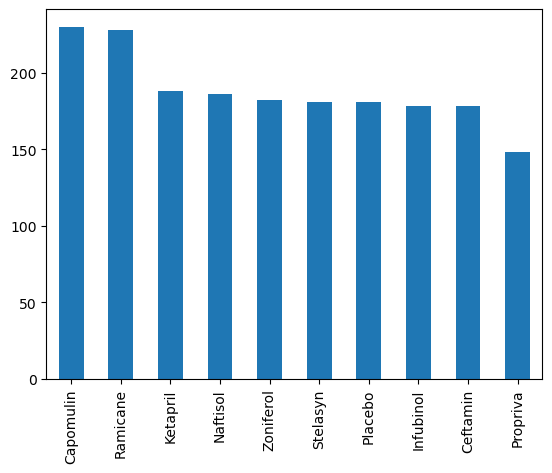

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints.plot(kind="bar")

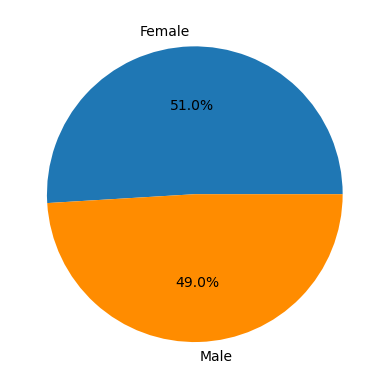

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = clean_df["Sex"].unique()
sex_df = clean_df["Sex"].value_counts()
colors = ["tab:blue","darkorange"]
plt.pie(sex_df, labels=labels, colors=colors, autopct="%1.1f%%")
plt.show()

<Axes: ylabel='Sex'>

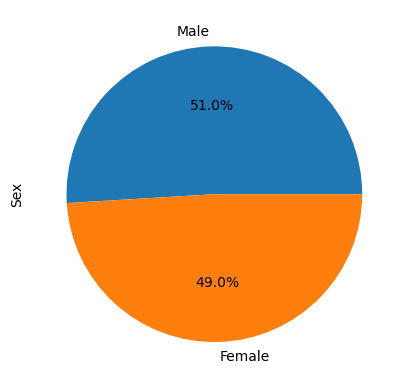

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df.plot(kind='pie', autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_per_mouse = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tp_df = pd.merge(clean_df,max_timepoint_per_mouse, how="inner", on=["Mouse ID", "Timepoint"])
last_tp_df.reset_index()
last_tp_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
# dru_reg = []
# unique_reg = [dru_reg.append(x) for x in last_tp_df["Drug Regimen"] if x not in dru_reg]
drug_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []
for drug in drug_reg:
    tumor_vol_x = last_tp_df.loc[last_tp_df["Drug Regimen"] == drug]
    tumor_vols.append(tumor_vol_x["Tumor Volume (mm3)"])
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lowerbound = []
upperbound = []

for drug in drug_reg:
    x = last_tp_df.loc[last_tp_df["Drug Regimen"] == drug]
    quartiles = x["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    lowerbound.append(lower_bound)
    upperbound.append(upper_bound)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
i = 0
for drug in drug_reg:
    x = last_tp_df.loc[last_tp_df["Drug Regimen"] == drug]
    outlier = x.loc[(x["Tumor Volume (mm3)"] < lowerbound[i]) | (x["Tumor Volume (mm3)"] > upperbound[i])]["Tumor Volume (mm3)"]
    print(f'{drug} potential outliers: {outlier}')
    i += 1         

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

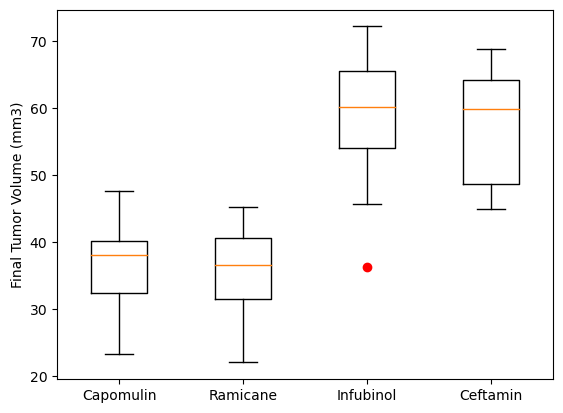

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vols, labels = drug_reg, sym='r')
plt.show

## Line and Scatter Plots

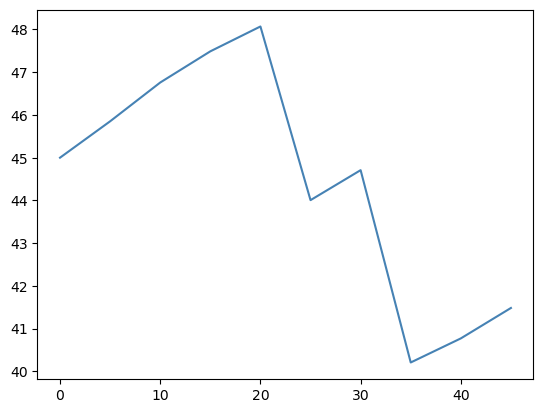

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_tumor_vol = clean_df.loc[(clean_df["Mouse ID"] == "l509") & (clean_df["Drug Regimen"] == "Capomulin") , "Tumor Volume (mm3)"]
mouse_timepoint = clean_df.loc[(clean_df["Mouse ID"] == "l509") & (clean_df["Drug Regimen"] == "Capomulin") , "Timepoint"]

mouse_plot = plt.plot(mouse_timepoint, mouse_tumor_vol, color="steelblue", label="Capomulin treatment of mouse l509")

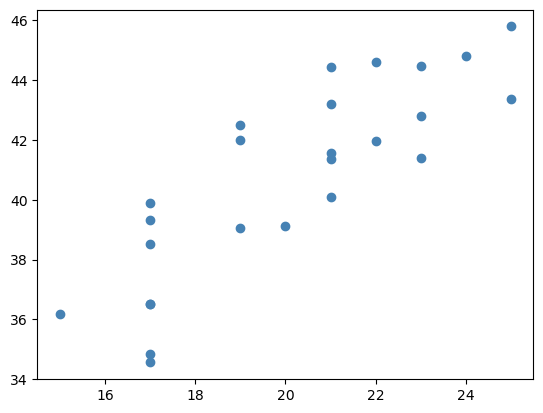

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
reduced_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]

cap_avg = reduced_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

cap_wgt = reduced_df.groupby("Mouse ID")["Weight (g)"].unique()

weight_plot = plt.scatter(cap_wgt, cap_avg, marker="o", facecolors="steelblue")

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = st.pearsonr(cap_wgt,cap_avg)[0]
print(f"The correlation between mouse weight and the average tumor volume is  {corr}")


# pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(cap_wgt, cap_avg)
# pe_fit = pe_slope * cap_wgt + pe_int

The correlation between mouse weight and the average tumor volume is  [0.84116671]


The correlation between mouse weight and the average tumor volume is 0.84


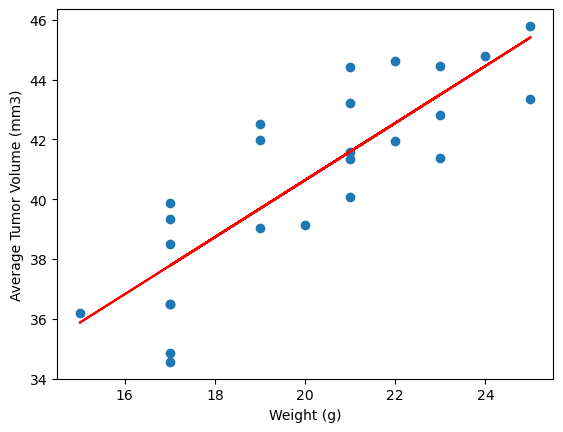

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
reg_time = clean_df.set_index("Drug Regimen")
#reg_time = reg_time["Timepoint"].value_counts()
#reg_time
#reg_time = reg_time.set_index("Drug Regimen")
#reg_time_count = reg_time["Timepoint"].value_counts()
#reg_time_count

#fig1 = reg_time_count.plot(kind="bar", facecolor="blue")